In [73]:
# !pip install xlrd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dataset = pd.read_excel('credit_card.xls', header=1, index_col=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

In [4]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
dataset.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
import numpy as np

In [7]:
model_features = list(set(dataset.columns).difference({"ID", "default payment next month"}))
target = ["default payment next month"]
X = dataset[model_features]
y = dataset[target]

In [8]:
id_pos = np.where(y.values.reshape(-1) == 1)[0]
id_neg = np.where(y.values.reshape(-1) == 0)[0]

In [9]:
np.random.shuffle(id_pos)
np.random.shuffle(id_neg)

In [10]:
# Tập train:
id_train_neg = id_neg[:10000] 
id_train_pos = id_pos[:500]
id_train = np.concatenate((id_train_neg, id_train_pos), axis = 0)

In [11]:
# Tập val:
id_val_neg = id_neg[10000:12000]
id_val_pos = id_pos[500:600]
id_val = np.concatenate((id_val_neg, id_val_pos), axis = 0)

In [12]:
# Tập test:
id_test_neg = id_neg[14000:16000]
id_test_pos = id_pos[700:800]
id_test = np.concatenate((id_test_neg, id_test_pos), axis = 0)

In [13]:
# khởi tạo dataset
data_train = dataset.iloc[id_train]
data_val = dataset.iloc[id_val]
data_test = dataset.iloc[id_test] 

In [14]:
print('data train shape: ', data_train.shape)
print('data val shape: ', data_val.shape)
print('data test shape: ', data_test.shape)

data train shape:  (10500, 24)
data val shape:  (2100, 24)
data test shape:  (2100, 24)


<h1>Xây dựng model</h1>

<h1>Over Sampling</h1>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score

<h1>SMOTE And Adasyn</h1>

In [16]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC, KMeansSMOTE)
from sklearn.cluster import MiniBatchKMeans as MiniKM

clf = MiniKM(n_clusters=100, random_state=0)

<h3>Random Forest</h3>

In [22]:
smotes = {0 : 'SMOTE',
          1 : 'BorderlineSMOTE',
          2 : 'SVMSMOTE',
          3 : 'SMOTENC',
          4 : 'KMeansSMOTE',
          5 : 'ADASYN'}

In [20]:
result_dict = {}

In [29]:
def train_model(model_name):
  categorical_feature_indices = [2, 10]
  for i, sampler in enumerate((SMOTE(sampling_strategy=1, random_state=0),
                                BorderlineSMOTE(sampling_strategy=1, random_state=0, kind='borderline-1'),
                                SVMSMOTE(sampling_strategy=1, random_state=0),
                                SMOTENC(categorical_features=categorical_feature_indices, sampling_strategy=1, random_state=0),
                                KMeansSMOTE(sampling_strategy=1, random_state=0, k_neighbors=10,
                                            kmeans_estimator=clf, cluster_balance_threshold=0.05),
                                ADASYN(sampling_strategy=1, random_state=0))):

      X, y = sampler.fit_resample(data_train[model_features], data_train['default payment next month'])
      print(f"Before: {data_train['default payment next month'].value_counts()}")
      print(f"After: {y.value_counts()}")

      pipe_line = make_pipeline(sampler, model_name)
      pipe_line.fit(data_train[model_features], data_train['default payment next month'])
      lr_predictions = pipe_line.predict_proba(data_test[model_features])
      lr_pred_label = pipe_line.predict(data_test[model_features])
      lr_roc_score = roc_auc_score(data_test['default payment next month'], lr_predictions[:, 1])
      lr_f1_score = f1_score(data_test['default payment next month'], lr_pred_label)
      result_dict[smotes[i]] = [round(lr_roc_score, 2), round(lr_f1_score, 2)]
      print('-' * 100)
      print('SMOTE method: ', smotes[i])
      print('Logistic Regression roc score on test: ', lr_roc_score)
      print('Logistic Regression f1 score on test: ', lr_f1_score)
      print('=' * 100)

In [30]:
def plot_result():
  dfplot = pd.DataFrame(result_dict).T.reset_index()
  dfplot.columns = ['case', 'ROC score', 'F1 score']
  dfplot = pd.melt(dfplot, id_vars= 'case', value_vars= ['ROC score', 'F1 score'])

  # Plot:
  plt.figure(figsize=(10, 5))
  ax = sns.barplot(data = dfplot, x = 'case', y = 'value', hue = 'variable')
  plt.title('Random Forest Classifier - ROC score and F1 score')
  for i in range(dfplot.variable.nunique()):
      plt.bar_label(ax.containers[i])
  plt.show()

In [31]:
train_model(RandomForestClassifier(n_estimators=100, random_state=42))

Before: default payment next month
0    10000
1      500
Name: count, dtype: int64
After: default payment next month
0    10000
1    10000
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SMOTE method:  SMOTE
Logistic Regression roc score on test:  0.6825225000000001
Logistic Regression f1 score on test:  0.1787709497206704
Before: default payment next month
0    10000
1      500
Name: count, dtype: int64
After: default payment next month
0    10000
1    10000
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SMOTE method:  BorderlineSMOTE
Logistic Regression roc score on test:  0.7090575000000001
Logistic Regression f1 score on test:  0.14473684210526314
Before: default payment next month
0    10000
1      500
Name: count, dtype: int64
After: default payment next month
0    10000
1     6173
Name: count, dtype: int64
----------------

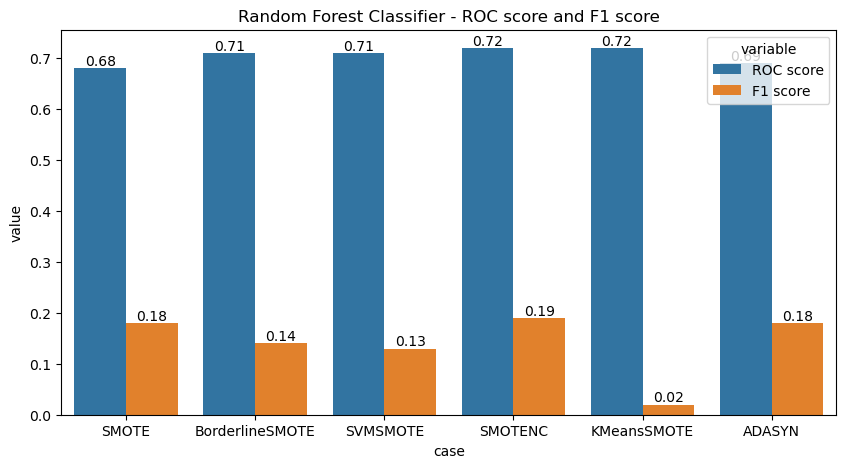

In [33]:
plot_result()

<h3>Decision Tree</h3>

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
result_dict = {}
train_model(DecisionTreeClassifier(random_state=42))

Before: default payment next month
0    10000
1      500
Name: count, dtype: int64
After: default payment next month
0    10000
1    10000
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SMOTE method:  SMOTE
Logistic Regression roc score on test:  0.5575
Logistic Regression f1 score on test:  0.1303116147308782
Before: default payment next month
0    10000
1      500
Name: count, dtype: int64
After: default payment next month
0    10000
1    10000
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SMOTE method:  BorderlineSMOTE
Logistic Regression roc score on test:  0.55575
Logistic Regression f1 score on test:  0.13468013468013468
Before: default payment next month
0    10000
1      500
Name: count, dtype: int64
After: default payment next month
0    10000
1     6173
Name: count, dtype: int64
---------------------------------------

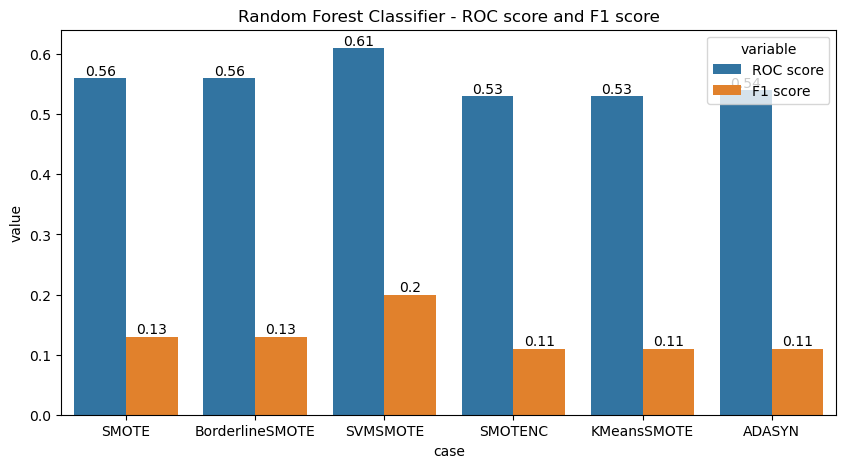

In [35]:
plot_result()

<h3>Logistic Regression</h3>

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
result_dict = {}
train_model(LogisticRegression(random_state=42))

Before: default payment next month
0    10000
1      500
Name: count, dtype: int64
After: default payment next month
0    10000
1    10000
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SMOTE method:  SMOTE
Logistic Regression roc score on test:  0.645215
Logistic Regression f1 score on test:  0.11650485436893204
Before: default payment next month
0    10000
1      500
Name: count, dtype: int64
After: default payment next month
0    10000
1    10000
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SMOTE method:  BorderlineSMOTE
Logistic Regression roc score on test:  0.64329
Logistic Regression f1 score on test:  0.11428571428571428
Before: default payment next month
0    10000
1      500
Name: count, dtype: int64
After: default payment next month
0    10000
1     6173
Name: count, dtype: int64
------------------------------------

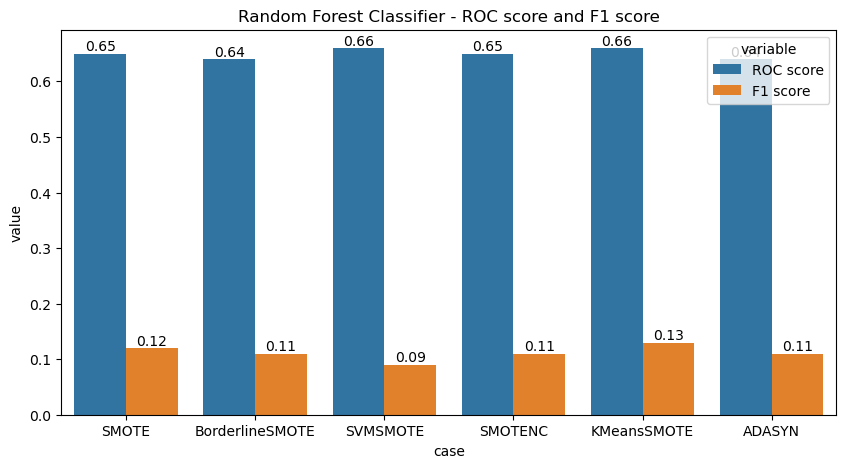

In [39]:
plot_result()